In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
#Load the dataframe from the path using pd.read_csv() and store the dataframe in a variable called 'data'
data=pd.read_csv('olympics_cleaned.csv')
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [92]:
data.rename(columns={'Total':'Total_Medals'}, inplace=True)

In [93]:
data.head(10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [97]:
data.shape

(147, 17)

In [98]:
data['Country_Name'].tolist()

['Afghanistan',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australasia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Bohemia',
 'Botswana',
 'Brazil',
 'British West Indies',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Ivory Coast',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'United Team of Germany',
 'East Germany',
 'West Germany',
 'Ghana',
 'Great Britain',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Kazakhstan',
 'Kenya',
 'North Korea',
 'South Korea',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'L

In [99]:
#Create a new column Better_Event that stores 'Summer','Winter' or 'Both' based on the comparision between
#the total medals won in Summer event and Winter event (i.e. comparision between the Total_Summer and 
#Total_Winter columns)using "np.where()"function.
data['Better_Event'] = np.where(data['Total_Summer'] > data['Total_Winter'], 'Summer', 'Winter')
data['Better_Event'] = np.where(data['Total_Summer'] == data['Total_Winter'], 'Both', data['Better_Event'])



In [100]:
# by default whenever we do a value_counts, it goes in descending order that is ascending=False
data['Better_Event'].value_counts()

Summer    143
Winter      3
Both        1
Name: Better_Event, dtype: int64

In [102]:
#Find out which has been a better event with respect to all the performing countries by using value_counts() 
#function and store it in a new variable called 'better_event'.
# this can be done by either of the methods listed below
#better_event = data['Better_Event'].value_counts().index.values[0]
better_event = data['Better_Event'].value_counts().idxmax()
better_event

'Summer'

In [103]:
#Create a new dataframe subset called 'top_countries' with the columns
#['Country_Name','Total_Summer', 'Total_Winter','Total_Medals'] only
top_countries=data[['Country_Name', 'Total_Summer', 'Total_Winter','Total_Medals']]
top_countries

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12
...,...,...,...,...
142,Independent Olympic Participants,3,0,3
143,Zambia,2,0,2
144,Zimbabwe,8,0,8
145,Mixed team,17,0,17


In [107]:
#Drop the last row from 'top_countries'(The last row contains the sum of the medals)
top_countries=top_countries[:-1]
top_countries

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12
...,...,...,...,...
141,Yugoslavia,83,4,87
142,Independent Olympic Participants,3,0,3
143,Zambia,2,0,2
144,Zimbabwe,8,0,8


In [108]:
#Create a function called 'top_ten' that:
#Takes the dataframe 'top_countries' and a column name as parameters.
#Creates a new empty list called 'country_list'
#Find the top 10 values for that particular column(for e.g. 'Total_Summer') using "nlargest()" function
#From the dataframe returned by nlargest function, slices the Country_Name column and stores it in the 'country_list' list
#Returns the 'country_list'
def top_ten(data, column):
    country_list=[]
    country_list=list(data.nlargest(10, column)['Country_Name'])
    return country_list


    

In [109]:
#explanation of the function top_ten
top_countries.nlargest(10,'Total_Summer')

,Country_Name,Total_Summer,Total_Winter,Total_Medals
135,United States,2399,282,2681
106,Soviet Union,1010,194,1204
49,Great Britain,780,26,806
41,France,671,109,780
44,Germany,573,209,782
64,Italy,549,114,663
120,Sweden,483,144,627
56,Hungary,476,6,482
23,China,473,53,526
5,Australia,468,12,480


In [110]:
top_countries.nlargest(10,'Total_Summer')['Country_Name']

135    United States
106     Soviet Union
49     Great Britain
41            France
44           Germany
64             Italy
120           Sweden
56           Hungary
23             China
5          Australia
Name: Country_Name, dtype: object

In [111]:
list(top_countries.nlargest(10,'Total_Summer')['Country_Name'])

['United States',
 'Soviet Union',
 'Great Britain',
 'France',
 'Germany',
 'Italy',
 'Sweden',
 'Hungary',
 'China',
 'Australia']

In [112]:
top_countries.nlargest(10,'Total_Summer')

,Country_Name,Total_Summer,Total_Winter,Total_Medals
135,United States,2399,282,2681
106,Soviet Union,1010,194,1204
49,Great Britain,780,26,806
41,France,671,109,780
44,Germany,573,209,782
64,Italy,549,114,663
120,Sweden,483,144,627
56,Hungary,476,6,482
23,China,473,53,526
5,Australia,468,12,480


In [113]:
top_countries.nlargest(10,'Total_Summer')['Country_Name']

135    United States
106     Soviet Union
49     Great Britain
41            France
44           Germany
64             Italy
120           Sweden
56           Hungary
23             China
5          Australia
Name: Country_Name, dtype: object

In [114]:
#Call the 'top_ten()' function for the three columns :Total_Summer,Total_Winter and Total_Medals
# and store their respective results in lists called 'top_10_summer', 'top_10_winter' and 'top_10'
top_10_summer = top_ten(top_countries, 'Total_Summer')
print("Top 10 Summer:\n",top_10_summer, "\n")

top_10_winter = top_ten(top_countries, 'Total_Winter')
print("Top 10 Winter:\n",top_10_winter, "\n")

top_10 = top_ten(top_countries,'Total_Medals')
print("Top 10:\n",top_10, "\n")

Top 10 Summer:
 ['United States', 'Soviet Union', 'Great Britain', 'France', 'Germany', 'Italy', 'Sweden', 'Hungary', 'China', 'Australia'] 

Top 10 Winter:
 ['Norway', 'United States', 'Austria', 'Germany', 'Soviet Union', 'Canada', 'Finland', 'Sweden', 'Switzerland', 'Russia'] 

Top 10:
 ['United States', 'Soviet Union', 'Great Britain', 'Germany', 'France', 'Italy', 'Sweden', 'China', 'East Germany', 'Russia'] 



In [115]:
#Create a new list 'common' that stores the common elements between the three lists
#('top_10_summer', 'top_10_winter' and 'top_10')
common=list(set(top_10_summer) & set(top_10_winter) & set(top_10))
print('common countries : \n', common, '\n')

common countries : 
 ['Soviet Union', 'Sweden', 'United States', 'Germany'] 



In [116]:
def prime(num):
    for i in range(2, num):
        if(num%i)==0:
            print(num, 'is not a prime number' )
            break
    else:
        print(num, 'is a prime number')
prime(11)
prime(51)
prime(67)
prime(37)
prime(7)
prime(79)
prime(5)

11 is a prime number
51 is not a prime number
67 is a prime number
37 is a prime number
7 is a prime number
79 is a prime number
5 is a prime number


In [117]:
data['Country_Name'].isin(top_10_summer)

0      False
1      False
2      False
3      False
4      False
       ...  
142    False
143    False
144    False
145    False
146    False
Name: Country_Name, Length: 147, dtype: bool

In [118]:
#Take the three previously created lists(top_10_summer, top_10_winter, top_10)
#Subset the dataframe 'data' based on the country names present in the list top_10_summer using "isin()" 
#function on the column Country_Name. Store the new subsetted dataframes in 'summer_df'. 
#Do the similar operation using top_10_winter and top_10 and 
#store the subset dataframes in 'winter_df' & 'top_df' respectively
summer_df=data[data['Country_Name'].isin(top_10_summer)  ]
summer_df

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Summer
23,China,9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,Summer
41,France,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,Summer
44,Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Summer
49,Great Britain,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,Summer
56,Hungary,25,167,144,165,476,22,0,2,4,6,47,167,146,169,482,Summer
64,Italy,26,198,166,185,549,22,37,34,43,114,48,235,200,228,663,Summer
106,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Summer
120,Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,Summer
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


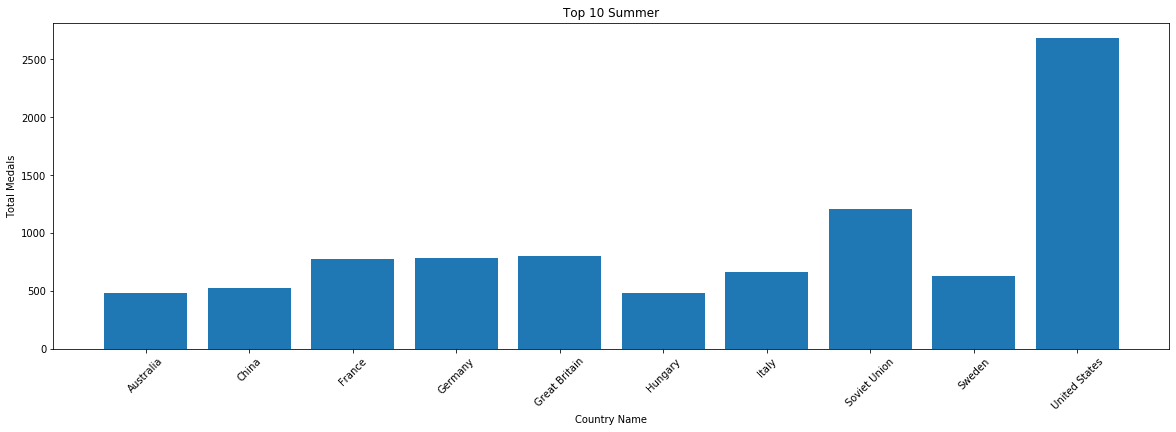

In [119]:
#Take each subsetted dataframe and plot a bar graph between the country name 
#and total medal count according to the event 
#(For e.g. for 'summer_df' plot a bar graph between Country_Name and Total_Summer)
plt.figure(figsize=(20,6))
plt.bar(summer_df['Country_Name'], summer_df['Total_Medals'])
plt.title('Top 10 Summer')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()



In [120]:
winter_df =data[data['Country_Name'].isin(top_10_winter)]
winter_df

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304,Winter
21,Canada,25,59,99,121,279,22,62,56,52,170,47,121,155,173,449,Summer
40,Finland,24,101,84,117,302,22,42,62,57,161,46,143,146,174,463,Summer
44,Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Summer
93,Norway,24,56,49,43,148,22,118,111,100,329,46,174,160,143,477,Winter
104,Russia,5,132,121,142,395,6,49,40,35,124,11,181,161,177,519,Summer
106,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Summer
120,Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,Summer
121,Switzerland,27,47,73,65,185,22,50,40,48,138,49,97,113,113,323,Summer
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


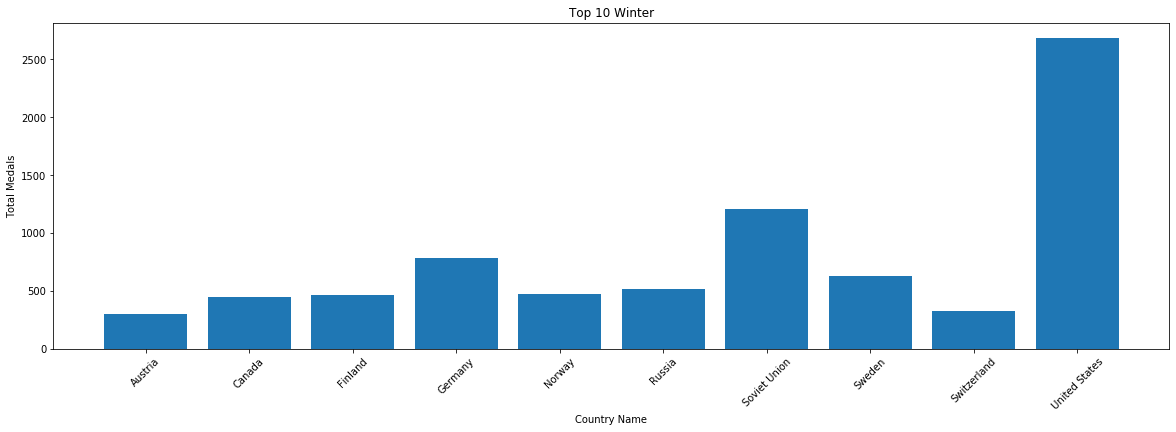

In [121]:
#Take each subsetted dataframe and plot a bar graph between the country name 
#and total medal count according to the event 
#(For e.g. for 'summer_df' plot a bar graph between Country_Name and Total_Winter)
plt.figure(figsize=(20,6))
plt.bar(winter_df['Country_Name'], winter_df['Total_Medals'])
plt.title('Top 10 Winter')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

In [122]:
top_df=data[data['Country_Name'].isin(top_10)]
top_df

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
23,China,9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,Summer
41,France,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,Summer
44,Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Summer
46,East Germany,5,153,129,127,409,6,39,36,35,110,11,192,165,162,519,Summer
49,Great Britain,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,Summer
64,Italy,26,198,166,185,549,22,37,34,43,114,48,235,200,228,663,Summer
104,Russia,5,132,121,142,395,6,49,40,35,124,11,181,161,177,519,Summer
106,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Summer
120,Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,Summer
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


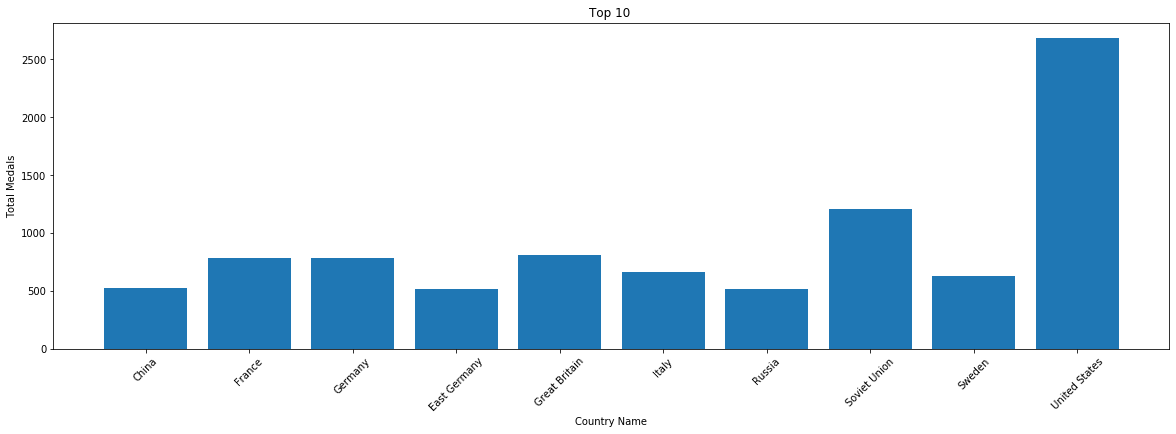

In [123]:
#Take each subsetted dataframe and plot a bar graph between the country name 
#and total medal count according to the event 
#(For e.g. for 'summer_df' plot a bar graph between Country_Name and Total_Winter)
plt.figure(figsize=(20,6))
plt.bar(top_df['Country_Name'], top_df['Total_Medals'])
plt.title('Top 10 ')
plt.xlabel('Country Name')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()

In [124]:
#In the dataframe 'summer_df'(created in the previous function) , create a new column Golden_Ratio which is 
#the quotient after dividing the two columns Gold_Summer and Total_Summer.
summer_df['Golden_Ratio'] = summer_df['Gold_Summer']/summer_df['Total_Summer']

C:\Users\sridharvumma\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
summer_df

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event,Golden_Ratio
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Summer,0.297009
23,China,9,201,146,126,473,10,12,22,19,53,19,213,168,145,526,Summer,0.424947
41,France,27,202,223,246,671,22,31,31,47,109,49,233,254,293,780,Summer,0.301043
44,Germany,15,174,182,217,573,11,78,78,53,209,26,252,260,270,782,Summer,0.303665
49,Great Britain,27,236,272,272,780,22,10,4,12,26,49,246,276,284,806,Summer,0.302564
56,Hungary,25,167,144,165,476,22,0,2,4,6,47,167,146,169,482,Summer,0.350840
64,Italy,26,198,166,185,549,22,37,34,43,114,48,235,200,228,663,Summer,0.360656
106,Soviet Union,9,395,319,296,1010,9,78,57,59,194,18,473,376,355,1204,Summer,0.391089
120,Sweden,26,143,164,176,483,22,50,40,54,144,48,193,204,230,627,Summer,0.296066
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer,0.406836


In [126]:
#Find the max value of Golden_Ratio and the country associated with it and 
#store them in summer_max_ratio and summer_country_gold respectively.
summer_max_ratio  = max(summer_df['Golden_Ratio'])
summer_max_ratio

0.4249471458773784

In [127]:
#Finding the country assosciated with the max value of 'Golden_Ratio' column
summer_country_gold = summer_df.loc[summer_df['Golden_Ratio'].idxmax(),'Country_Name']
summer_country_gold

'China'

In [128]:
print("Top Summer Country:", summer_country_gold, " with a ratio of %.2f" %summer_max_ratio )

Top Summer Country: China  with a ratio of 0.42


In [129]:
#Creating new column 'Golden_Ratio'
winter_df['Golden_Ratio']=winter_df['Gold_Winter']/winter_df['Total_Winter']


#Finding the max value of 'Golden_Ratio' column
winter_max_ratio=max(winter_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
winter_country_gold=winter_df.loc[winter_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Winter Country:", winter_country_gold, " with a ratio of %.2f" %winter_max_ratio )


#For Overall List


Top Winter Country: Soviet Union  with a ratio of 0.40


C:\Users\sridharvumma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [130]:
#Creating new column 'Golden_Ratio'
top_df['Golden_Ratio']= top_df['Gold_Total']/top_df['Total_Medals']

#Finding the max value of 'Golden_Ratio' column
top_max_ratio=max(top_df['Golden_Ratio'])

#Finding the country assosciated with the max value of 'Golden_Ratio' column
top_country_gold=top_df.loc[top_df['Golden_Ratio'].idxmax(),'Country_Name']

print("Top Country:", top_country_gold, " with a ratio of %.2f" %top_max_ratio )

Top Country: China  with a ratio of 0.40


C:\Users\sridharvumma\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [131]:
#Drop the last row from the dataframe(The last row contains the total of all the values calculated vertically)
#and save the result in 'data_1
data_1= data[:-1]
data_1.tail()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
141,Yugoslavia,16,26,29,28,83,14,0,3,1,4,30,26,32,29,87,Summer
142,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,Summer
143,Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,Summer
144,Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,Summer
145,Mixed team,3,8,5,4,17,0,0,0,0,0,3,8,5,4,17,Summer


In [132]:
#Update the dataframe 'data_1' to include a new column called Total_Points which is a
#weighted value where each gold medal counts for 3 points, silver medals for 2 points, and bronze medals for 1 point. 
#(i.e. You need to take the weighted value of Gold_Total, Silver_Total and Bronze_Total)
data_1['Total_Points']= data_1['Gold_Total']*3+data_1['Silver_Total']*2+data_1['Bronze_Total']*1


C:\Users\sridharvumma\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [133]:
#Find the max value of Total_Points in 'data_1' and the country associated with it and store it in variables 'most_points' 
#and 'best_country' respectively.
most_points = max(data_1['Total_Points'])

In [134]:
#Finding the country assosciated with the max value of 'Total_Column' column
best_country=data_1.loc[data_1['Total_Points'].idxmax(),'Country_Name']
print('The maximum points achieved is ', most_points, ' by ', best_country )

The maximum points achieved is  5684  by  United States


In [135]:
#Create a single row dataframe called 'best' from 'data' where the value of column Country_Name is equal to 
#'best_country'(The variable you created in the previous task
best =data[data['Country_Name']== best_country]
best

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


In [136]:
#Subset 'best' even further by only including the columns: ['Gold_Total','Silver_Total','Bronze_Total']
best.reset_index(drop=True,inplace=True)
best


,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
0,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


In [137]:
best = best[['Gold_Total','Silver_Total','Bronze_Total']]
best

,Gold_Total,Silver_Total,Bronze_Total
0,1072,859,750


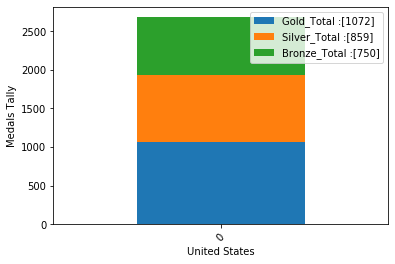

In [138]:
#Create a stacked bar plot of 'best' using "DataFrame.plot.bar()" function
#Name the x-axis as United States using "plt.xlabel()"
#Name the y-axis as Medals Tally using "plt.ylabel()"
#Rotate the labels of x-axis by 45o using "plt.xticks()"
best.plot.bar(stacked=True)
plt.xlabel('United States')
plt.ylabel('Medals Tally')
plt.xticks(rotation=45)

#Updating the graph legend
l=plt.legend()
l.get_texts()[0].set_text('Gold_Total :' + str(best['Gold_Total'].values))
l.get_texts()[1].set_text('Silver_Total :' + str(best['Silver_Total'].values))
l.get_texts()[2].set_text('Bronze_Total :' + str(best['Bronze_Total'].values))